<a href="https://colab.research.google.com/github/Sriyoshija/task5/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

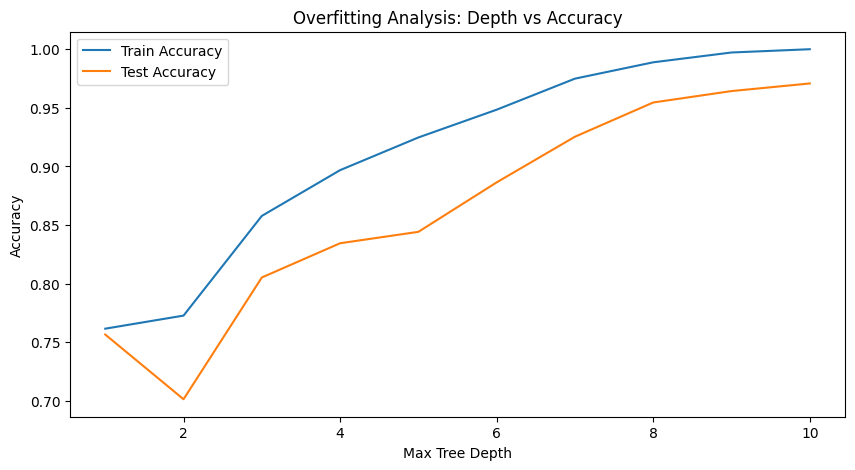


Decision Tree Test Accuracy: 0.971
Random Forest Test Accuracy: 0.981


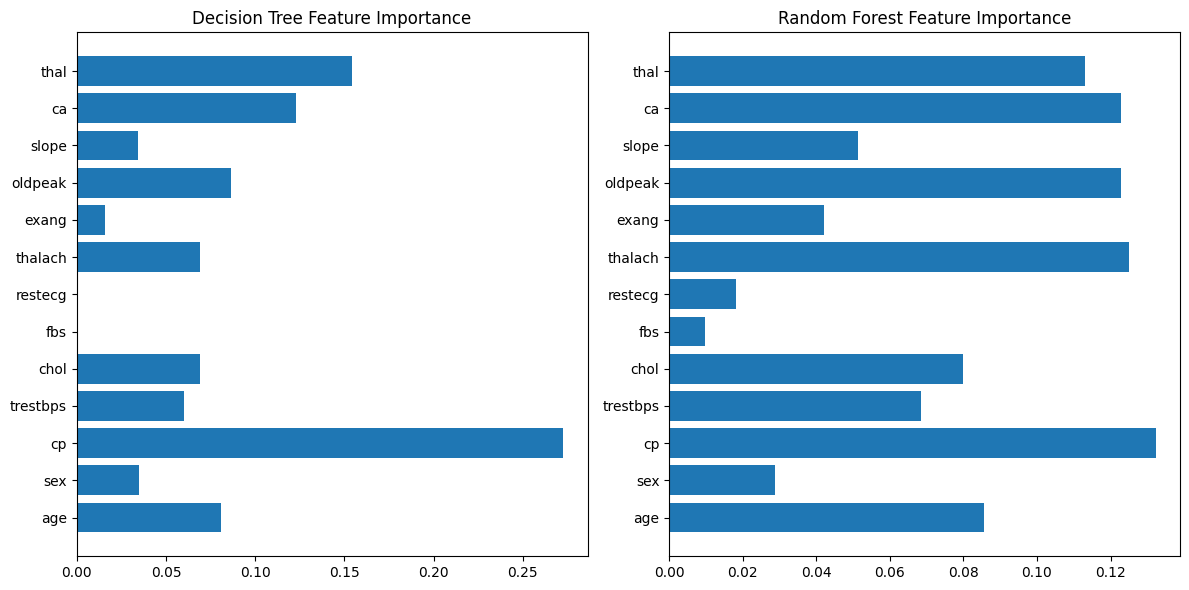


Cross-validation Results:
Decision Tree: Mean Accuracy = 1.000 (±0.000)
Random Forest: Mean Accuracy = 0.997 (±0.006)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import graphviz

df = pd.read_csv('/content/heart.csv')
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Decision Tree Classifier with visualization
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dot_data = export_graphviz(dt, out_file=None,
                          feature_names=X.columns,
                          class_names=y.unique().astype(str),
                          filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph.view("decision_tree")

#Overfitting analysis with tree depth control
max_depths = range(1, 11)
train_scores, test_scores = [], []

for depth in max_depths:
    dt_tuned = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_tuned.fit(X_train, y_train)
    train_scores.append(dt_tuned.score(X_train, y_train))
    test_scores.append(dt_tuned.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_scores, label='Train Accuracy')
plt.plot(max_depths, test_scores, label='Test Accuracy')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis: Depth vs Accuracy')
plt.legend()
plt.show()

#Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)
print(f"\nDecision Tree Test Accuracy: {accuracy_score(y_test, dt_pred):.3f}")
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, rf_pred):.3f}")

#Feature Importance Interpretation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(X.columns, dt.feature_importances_)
plt.title('Decision Tree Feature Importance')
plt.subplot(1, 2, 2)
plt.barh(X.columns, rf.feature_importances_)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

#Cross-validation Evaluation
dt_cv = cross_val_score(dt, X, y, cv=5)
rf_cv = cross_val_score(rf, X, y, cv=5)
print("\nCross-validation Results:")
print(f"Decision Tree: Mean Accuracy = {dt_cv.mean():.3f} (±{dt_cv.std():.3f})")
print(f"Random Forest: Mean Accuracy = {rf_cv.mean():.3f} (±{rf_cv.std():.3f})")